# GRAPL: Tutorial 04


Tutorial illustrating the use of the GRAPL library, for representing, analyzing and processing
**acyclic directed mixed graphs** (**ADMG**s) for structural causal modelling.

**License**: CC BY-SA 4.0 2021. 


If you use this code, please cite:

Little, M. A., Badawy, R. (2019). [Causal bootstrapping](https://arxiv.org/pdf/1910.09648.pdf), *ArXiV*, arXiv:1910.09648

In [1]:
import grapl.algorithms as algs
import grapl.dsl as dsl

### Create a GRAPL DSL parser

In [2]:
grapl_obj = dsl.GraplDSL()

### Read a DAG from a `.grapl` file

In [3]:
G = grapl_obj.readgrapl(open('../graphs/richardson_2017.grapl', 'r').read())

### Display the DAG object

#### Text description

In [4]:
G.display()

Title: "Richardson et al. 2017, Figure 3"
Vars: X4,X2,X3,X1
Parents:
X4 <- X3
X2 <- X1
X3 <- X2,X1
Children:
X2 -> X3
X3 -> X4
X1 -> X2,X3
Bidirects:
X4 <--> X2
X2 <--> X4


#### Graph

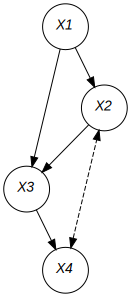

In [5]:
G

### Check if the ADMG is acyclic

In [6]:
G.isayclic() # Expected: True

True

### Get topological sort of DAG nodes

In [7]:
G.topsort()

['X1', 'X2', 'X3', 'X4']

### Compute all ADMG districts

In [8]:
G.districts() # Expected: [{'X3'}, {'X2', 'X4'}, {'X1'}]

[{'X2', 'X4'}, {'X1'}, {'X3'}]

### Get interventional (cause-effect) distribution of `X2` on `X4`

In [9]:
id_str, id_eqn, isident = algs.idfixing(G, {'X2'}, {'X4'})

id_eqn # Expected: p_{X2}(X4)=\sum_{X3,X2',X1',X1}[p(X4|X3,X2',X1')p(X3|X2,X1)p(X2',X1')p(X1)]